In [1]:
#import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate the folder name with current date and time
#folder_name = 'results/task_match_0603_2238/'
folder_name = 'results/task_match_1803_1138'

In [3]:
#open json file as dataframe
df = pd.read_json(folder_name + "/no_prompt_0_sim.json").dropna()
df

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,[Develop and implement a property management p...,0.525061,"[[0.5755310059000001, 0.668864727, 0.448864102...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 1, 6, 15, 4, 0, 19, 17, 10, 2, 21, 12, 7, ..."
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[Scheduling and coordinating spa treatments wi...,0.492923,"[[0.2186053097, 0.6240108609, 0.2700763941, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[15, 13, 4, 20, 10, 9, 2, 16, 7, 19, 1, 11, 18..."
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,[Develop and implement comprehensive training ...,0.614039,"[[0.7035169601, 0.5544979572000001, 0.63713377...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[3, 8, 0, 4, 5, 7, 2, 10, 6, 1, 9]"
3,Customs Brokers,[Prepare and process import and export documen...,13,[Analyzing commercial invoices to ensure accur...,0.485955,"[[0.3173137605, 0.7258229256000001, 0.49118354...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[7, 14, 0, 18, 1, 16, 4, 20, 8, 13, 12, 17, 2,..."
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Conduct on-site inspections of government-own...,0.616385,"[[0.4828875661, 0.568287313, 0.417788803600000...","[0, 1, 2]","[1, 2, 0]"
5,Video Game Designers,[Balance and adjust gameplay experiences to en...,15,"[Designing and developing new game mechanics, ...",0.490362,"[[0.5624153018, 0.3587047458, 0.40337955950000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[21, 3, 9, 12, 13, 5, 16, 19, 18, 15, 8, 2, 4,..."
6,Nanosystems Engineers,[Provide scientific or technical guidance or e...,17,"[Design and develop nanoscale devices, such as...",0.546913,"[[0.4323000312, 0.4014983475, 0.5029799938, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[13, 16, 0, 4, 8, 9, 5, 12, 14, 11, 15, 3, 7, ..."
7,Industrial Engineers,"[Estimate production costs, cost saving method...",17,"[Design, plan, and implement efficient systems...",0.488685,"[[0.5056679845000001, 0.4526145756, 0.35985293...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[7, 0, 15, 11, 16, 3, 6, 8, 9, 17, 2, 14, 13, ..."
8,Surveying and Mapping Technicians,"[Position and hold the vertical rods, or targe...",17,"[Use total stations, levelling instruments, an...",0.537598,"[[0.3835660815, 0.2396126688, 0.22866623100000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 15, 13, 11, 0, 10, 12, 16, 8, 6, 9, 14, 7,..."
9,Conservation Scientists,[Apply principles of specialized fields of sci...,19,[Conduct field studies to monitor wildlife pop...,0.498174,"[[0.4463498294, 0.6440560818000001, 0.66314727...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 19, 24, 4, 3, 5, 27, 18, 23, 16, 1, 12, 15..."


In [4]:
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz = jz.drop(labels=['date', 'domain_source'], axis=1)   
jz = jz.rename(columns={'o*net-soc_code':'code', 'job_zone':'zone'})

#merge the two dataframes on title
df = pd.merge(df, jz, on='title', how='left')
df

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,[Develop and implement a property management p...,0.525061,"[[0.5755310059000001, 0.668864727, 0.448864102...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 1, 6, 15, 4, 0, 19, 17, 10, 2, 21, 12, 7, ...",11-9081.00,4
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[Scheduling and coordinating spa treatments wi...,0.492923,"[[0.2186053097, 0.6240108609, 0.2700763941, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[15, 13, 4, 20, 10, 9, 2, 16, 7, 19, 1, 11, 18...",11-9179.02,3
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,[Develop and implement comprehensive training ...,0.614039,"[[0.7035169601, 0.5544979572000001, 0.63713377...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[3, 8, 0, 4, 5, 7, 2, 10, 6, 1, 9]",11-3131.00,4
3,Customs Brokers,[Prepare and process import and export documen...,13,[Analyzing commercial invoices to ensure accur...,0.485955,"[[0.3173137605, 0.7258229256000001, 0.49118354...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[7, 14, 0, 18, 1, 16, 4, 20, 8, 13, 12, 17, 2,...",13-1041.08,3
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Conduct on-site inspections of government-own...,0.616385,"[[0.4828875661, 0.568287313, 0.417788803600000...","[0, 1, 2]","[1, 2, 0]",13-1041.04,3
5,Video Game Designers,[Balance and adjust gameplay experiences to en...,15,"[Designing and developing new game mechanics, ...",0.490362,"[[0.5624153018, 0.3587047458, 0.40337955950000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[21, 3, 9, 12, 13, 5, 16, 19, 18, 15, 8, 2, 4,...",15-1255.01,4
6,Nanosystems Engineers,[Provide scientific or technical guidance or e...,17,"[Design and develop nanoscale devices, such as...",0.546913,"[[0.4323000312, 0.4014983475, 0.5029799938, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[13, 16, 0, 4, 8, 9, 5, 12, 14, 11, 15, 3, 7, ...",17-2199.09,5
7,Industrial Engineers,"[Estimate production costs, cost saving method...",17,"[Design, plan, and implement efficient systems...",0.488685,"[[0.5056679845000001, 0.4526145756, 0.35985293...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[7, 0, 15, 11, 16, 3, 6, 8, 9, 17, 2, 14, 13, ...",17-2112.00,4
8,Surveying and Mapping Technicians,"[Position and hold the vertical rods, or targe...",17,"[Use total stations, levelling instruments, an...",0.537598,"[[0.3835660815, 0.2396126688, 0.22866623100000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 15, 13, 11, 0, 10, 12, 16, 8, 6, 9, 14, 7,...",17-3031.00,3
9,Conservation Scientists,[Apply principles of specialized fields of sci...,19,[Conduct field studies to monitor wildlife pop...,0.498174,"[[0.4463498294, 0.6440560818000001, 0.66314727...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 19, 24, 4, 3, 5, 27, 18, 23, 16, 1, 12, 15...",19-1031.00,4


Text(0.5, 1.0, 'mean similarity score by industry')

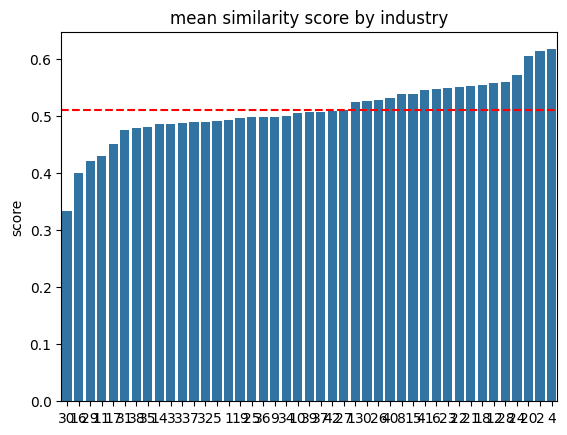

In [5]:
mean_score = df["score"]
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by industry')

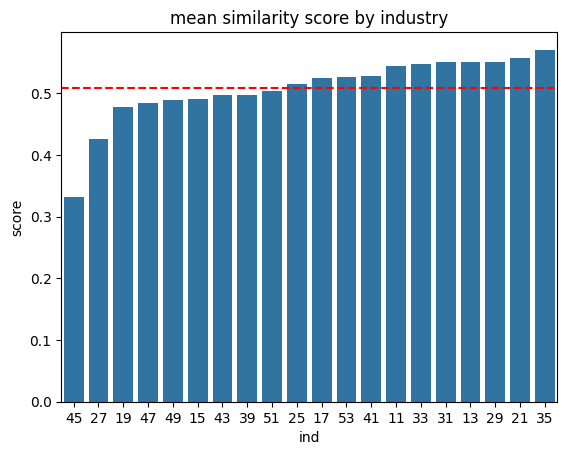

In [6]:
# get mean similarity score base on industry
mean_score = df.groupby("ind")["score"].mean()
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by job zone')

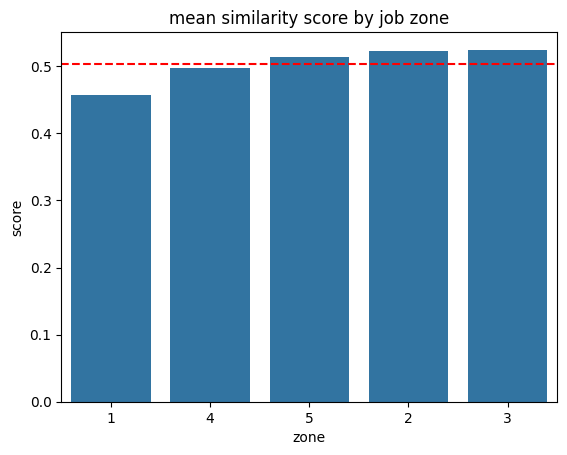

In [8]:
#plot similarity score by job zone
mean_score = df.groupby("zone")["score"].mean()
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by job zone")

In [9]:
max_similarity = df[df["score"] == df["score"].max()]
max_similarity

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Conduct on-site inspections of government-own...,0.616385,"[[0.4828875661, 0.568287313, 0.417788803600000...","[0, 1, 2]","[1, 2, 0]",13-1041.04,3


Text(0.5, 1.0, 'similarity matrix of Government Property Inspectors and Investigators')

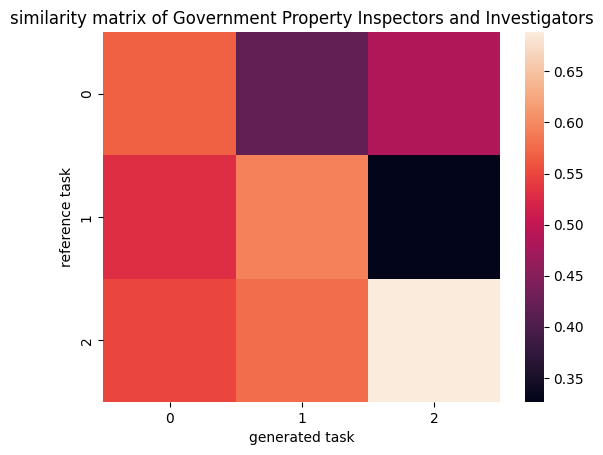

In [10]:
x = max_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [11]:
min_similarity = df[df["score"] == df["score"].min()]
min_similarity

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
30,Fallers,"[Stop saw engines, pull cutting bars from cuts...",45,[Assess risk of falling on site and develop st...,0.332419,"[[0.2224165499, 0.23636011780000002, 0.1188549...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[7, 0, 6, 8, 12, 9, 2, 3, 11, 1, 5, 10, 4]",45-4021.00,1


Text(0.5, 1.0, 'similarity matrix of Fallers')

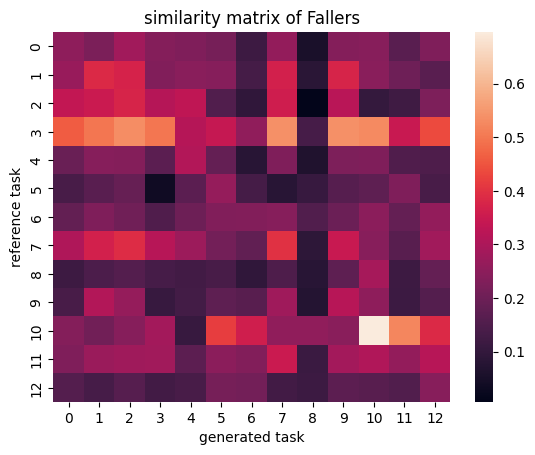

In [12]:
x = min_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [16]:
#create a df dropping the rows with matrix shape not equal to (x, x)
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
#define a function to rearrange matrix based on gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#apply the function to the matrix column
df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)



In [13]:
# find the best rearranged matrix
def is_diagonally_dominant(rearranged_matrix):
    D = np.abs(np.diag(rearranged_matrix))
    S = np.sum(np.abs(rearranged_matrix), axis=1) - D
    return np.all(D >= S)

def calculate_score(rearranged_matrix):
    score = 0
    for i in range(np.shape(rearranged_matrix)[0]):
        max_off_diagonal = max(abs(rearranged_matrix[i][j]) for j in range(np.shape(rearranged_matrix)[1]) if j != i)
        score += abs(rearranged_matrix[i][i]) - max_off_diagonal
    return score

def find_best_rearranged_matrix(df):
    best_score = -float('inf')
    best_index = None
    for index, row in df.iterrows():
        rearranged_matrix = row['rearranged_matrix']
        if is_diagonally_dominant(rearranged_matrix):
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
    if best_index is not None:
        return best_index, best_score
    else:
        # If no diagonally dominant rearranged_matrix found, consider all with highest score
        for index, row in df.iterrows():
            rearranged_matrix = row['rearranged_matrix']
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
        return best_index, best_score

In [17]:
# Example usage
index, score = find_best_rearranged_matrix(df_test)
if index is not None:
    print(f"The best rearranged_matrix is at index {index} with score {score}")
else:
    print("No suitable rearranged_matrix found.")

The best rearranged_matrix is at index 8 with score 0.6775278449000002


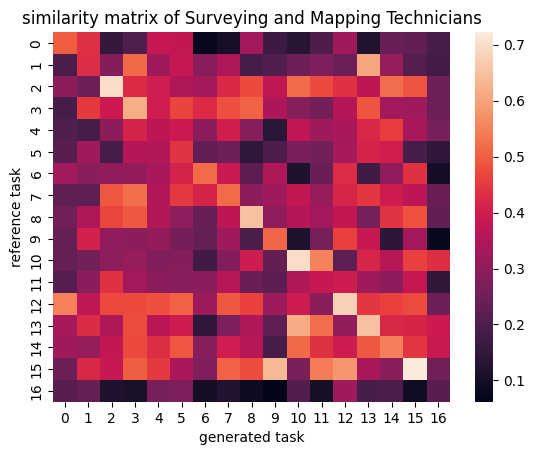

In [18]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

In [6]:
mean = df["score"].mean()
np.save(folder_name + "/score.npy", mean)